In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

drive.mount('/content/gdrive')

# Load data
data_route = '/content/gdrive/My Drive/music_score_emotion_stock_fillna.csv'
stock_data = pd.read_csv(data_route, encoding='utf-8')
stock_data = stock_data[stock_data['entertain'] == '에프엔씨엔터']
stock_data = stock_data[stock_data['Date'] >= '2018.12.31']
stock_data = stock_data.sort_values(by='Date', ascending=True)

# Drop unnecessary columns
stock_data = stock_data.drop(columns='entertain')

# Convert columns to float
stock_data['종가'] = stock_data['종가'].str.replace(',', '').astype(float)
stock_data['시가'] = stock_data['시가'].str.replace(',', '').astype(float)
stock_data['고가'] = stock_data['고가'].str.replace(',', '').astype(float)
stock_data['저가'] = stock_data['저가'].str.replace(',', '').astype(float)
stock_data['거래량'] = stock_data['거래량'].str.replace(',', '').astype(float)

# Assuming 'Date' is your date column
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Extract '종가' prices for modeling
prices = stock_data['종가']

# Perform any further preprocessing if needed

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

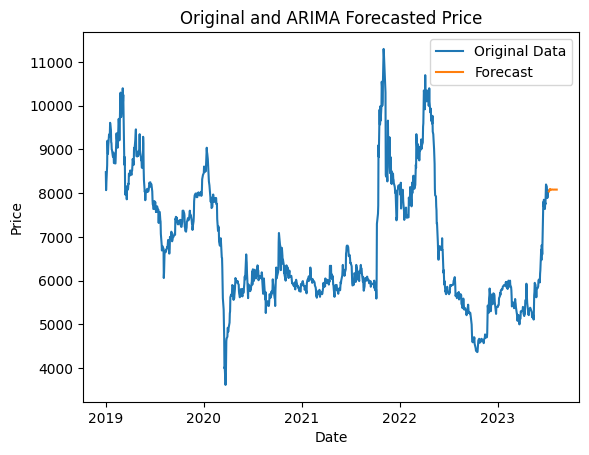

In [3]:
# Define ARIMA model parameters (p, d, q)
p = 2  # Autoregressive order
d = 1  # Differencing order
q = 2  # Moving average order

# Create and fit ARIMA model
model = ARIMA(prices, order=(p, d, q))
results = model.fit()

# Forecast next 'n' periods
n = 30  # Number of periods to forecast
forecast = results.forecast(steps=n)

# Plot original data and forecasted values
plt.plot(prices.index, prices, label='Original Data')
plt.plot(pd.date_range(start=prices.index[-1], periods=n+1, freq='D', closed='right'), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and ARIMA Forecasted Price')
plt.legend()
plt.show()



In [4]:
# 시가 저장
original_open = stock_data['시가'].values

# plot에 사용할 날짜데이터 저장
dates = pd.to_datetime(stock_data.index)  # 'Date' 열을 인덱스로 사용

cols = list(stock_data.columns)
stock_data = stock_data[cols]

print(stock_data)

# 정규화
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)


                종가      시가      고가      저가       거래량  ScoreSum  ScoreCount  \
Date                                                                         
2019-01-02  8480.0  8000.0  8610.0  8000.0  195383.0       0.0         0.0   
2019-01-03  8070.0  8430.0  8620.0  7800.0  110724.0       0.0         0.0   
2019-01-04  8230.0  8020.0  8230.0  7710.0   76443.0       0.0         0.0   
2019-01-07  8640.0  8250.0  8690.0  8230.0   97739.0       0.0         0.0   
2019-01-08  9200.0  8750.0  9420.0  8730.0  486097.0       0.0         0.0   
...            ...     ...     ...     ...       ...       ...         ...   
2023-07-04  8030.0  8240.0  8250.0  7890.0   88288.0       0.0         0.0   
2023-07-05  7890.0  8060.0  8060.0  7860.0   26861.0       0.0         0.0   
2023-07-06  7920.0  7940.0  7940.0  7490.0   94459.0       0.0         0.0   
2023-07-07  8000.0  7720.0  8020.0  7580.0   38343.0       0.0         0.0   
2023-07-10  8060.0  8000.0  8060.0  7740.0   31552.0       0.0  

In [5]:
# 데이터 분할
n_train = int(0.9 * stock_data_scaled.shape[0])
print(stock_data_scaled.shape[0])
print(n_train)
train_data_scaled = stock_data_scaled[:n_train]
train_dates = dates[:n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

# ARIMA 모델은 시퀀스와 레이블을 사용하지 않으므로 trainX, trainY, testX, testY를 사용하지 않습니다.

1117
1005


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

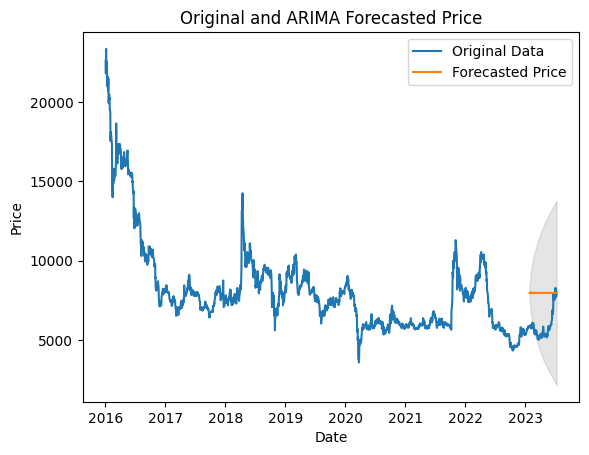

Mean Absolute Error: 2070.5763569648047
Root Mean Squared Error: 2228.2179930132606
R-squared: -5.812988044926403


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

drive.mount('/content/gdrive')

# Load data
data_route = '/content/gdrive/My Drive/music_score_emotion_stock_fillna.csv'
stock_data = pd.read_csv(data_route, encoding='utf-8')
stock_data = stock_data[stock_data['entertain'] == '에프엔씨엔터']
stock_data = stock_data.sort_values(by='Date', ascending=True)

# Drop unnecessary columns
stock_data = stock_data.drop(columns='entertain')

# Convert columns to float
stock_data['종가'] = stock_data['종가'].str.replace(',', '').astype(float)
stock_data['시가'] = stock_data['시가'].str.replace(',', '').astype(float)
stock_data['고가'] = stock_data['고가'].str.replace(',', '').astype(float)
stock_data['저가'] = stock_data['저가'].str.replace(',', '').astype(float)
stock_data['거래량'] = stock_data['거래량'].str.replace(',', '').astype(float)

# Assuming 'Date' is your date column
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Extract '시가' prices for modeling
prices = stock_data['시가']

# Perform any further preprocessing if needed

# Define ARIMA model parameters (p, d, q)
p = 2  # Autoregressive order
d = 1  # Differencing order
q = 2  # Moving average order

# Create and fit ARIMA model
model = ARIMA(prices, order=(p, d, q))
results = model.fit()

# Forecast next 'n' periods
n = len(test_dates)  # Forecast for the length of the test set
forecast = results.get_forecast(steps=n)
forecasted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Plot original data, forecasted values, and confidence interval
plt.plot(prices.index, prices, label='Original Data')
plt.plot(test_dates, forecasted_mean, label='Forecasted Price')
plt.fill_between(test_dates, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and ARIMA Forecasted Price')
plt.legend()
plt.show()

# Calculate performance metrics (if needed)
forecasted_values = forecasted_mean.values
actual_values = prices[-n:]  # Use the last 'n' actual data points for comparison
mae = mean_absolute_error(actual_values, forecasted_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
r2 = r2_score(actual_values, forecasted_values)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


In [7]:
# @title 성능 지표
def confirm_result(actual_values, forecasted_values):
    MAE = mean_absolute_error(actual_values, forecasted_values)
    RMSE = np.sqrt(mean_squared_error(actual_values, forecasted_values))
    MSLE = mean_squared_log_error(actual_values, forecasted_values)
    RMSLE = np.sqrt(mean_squared_log_error(actual_values, forecasted_values))
    R2 = r2_score(actual_values, forecasted_values)

    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE, RMSE, RMSLE, R2],
                          index=['MAE', 'RMSE', 'RMSLE', 'R2'],
                          columns=['Results'])
    return Result

# Calculate performance metrics
result = confirm_result(prices[-n:], forecasted_mean)
print(result)


         Results
MAE   2070.57636
RMSE  2228.21799
RMSLE    0.33484
R2      -5.81299


In [8]:
# Calculate performance metrics
result = confirm_result(prices[-n:], forecasted_values)
print(result)


         Results
MAE   2070.57636
RMSE  2228.21799
RMSLE    0.33484
R2      -5.81299
